# Project 1 - Tehran House Price Prediction - Clean the dataset

- Cleaning the dataset


- Course Name :         Applied Machine Learning
- Course instructor:    Sohail Tehranipour
- Student Name :        Afshin Masoudi Ashtiani
- Project 1 -           Tehran House Price Prediction
- Date :                September 2024
- File(ipynb) :         1/5

## Step 1: Install required libraries

In [1]:
%pip install numpy pandas requests bs4

Note: you may need to restart the kernel to use updated packages.


## Step 2: Import required libraries

In [2]:
import re
import pandas as pd
import numpy as np

import requests
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

## Step 3 : Load and Prepare data

### I : Load the dataset

In [9]:
# Load dataset
# dataset_path = r'/content/drive/My Drive/Applied Machine Learning/Project 1 : Tehran House Price Prediction/datasets/housePrice.csv'
dataset_path = r'C:/Users/Afshin/Desktop/Project_1/datasets/housePrice.csv'
df = pd.read_csv(dataset_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


### II : Update the **Price**

- Convert English numbers in a string to Persian numbers

In [10]:
def convert_to_persian_numbers(text: str) -> str:
    """Convert English numbers in a string to Persian numbers."""
    english_to_persian = {
        '0': '۰',
        '1': '۱',
        '2': '۲',
        '3': '۳',
        '4': '۴',
        '5': '۵',
        '6': '۶',
        '7': '۷',
        '8': '۸',
        '9': '۹'
    }

    # Replace English digits with Persian digits
    for eng_digit, persian_digit in english_to_persian.items():
        text = text.replace(eng_digit, persian_digit)

    return text

- Get the today Price(USD)

In [11]:
def get_USD_to_IR() -> float:
    url = 'https://www.tgju.org/profile/price_dollar_rl'
    response = requests.get(url)
    if response.status_code != 200:
        print(f'> Error in fetching {url}: {response.status_code}.')
        return 300000
    soup = BeautifulSoup(response.text, 'html.parser')
    per_usd = soup.find('span', {'data-col' : 'info.last_trade.PDrCotVal'}).text.replace(',', '')
    return float(convert_to_persian_numbers(per_usd))

In [12]:
today_usd = get_USD_to_IR()
# Every USD is equal to 30,000 Tomans (Extra Info).
correct_coeff = today_usd / 300000
print(f'>> Today Doller Price: {today_usd} (IRR)')
print(f'>> Correct Coefficient: {correct_coeff}')

>> Today Doller Price: 681750.0 (IRR)
>> Correct Coefficient: 2.2725


- Set display option

In [13]:
# Set display option for floating-point numbers
pd.set_option('display.float_format', lambda x: '%.f' % x)

- Correct the Price

In [14]:
df.Price = df.Price.apply(lambda x: x * correct_coeff * 10)
df.head(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,42041250000,61667
1,60,1,True,True,True,Shahran,42041250000,61667
2,79,2,True,True,True,Pardis,12498750000,18333
3,95,2,True,True,True,Shahrake Qods,20509312500,30083
4,123,2,True,True,True,Shahrake Gharb,159075000000,233333


### III : Drop irrequired columns

In [15]:
df = df.drop(['Price(USD)'], axis= 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       3479 non-null   object 
 1   Room       3479 non-null   int64  
 2   Parking    3479 non-null   bool   
 3   Warehouse  3479 non-null   bool   
 4   Elevator   3479 non-null   bool   
 5   Address    3456 non-null   object 
 6   Price      3479 non-null   float64
dtypes: bool(3), float64(1), int64(1), object(2)
memory usage: 119.0+ KB


## Step 4 : Data Cleaning

### I : Correct the datatype of columns

In [16]:
df.Area = df.Area.apply(lambda x: re.sub('\D', '', str(x)))
df.Area = pd.to_numeric(df.Area, errors= 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       3479 non-null   int64  
 1   Room       3479 non-null   int64  
 2   Parking    3479 non-null   bool   
 3   Warehouse  3479 non-null   bool   
 4   Elevator   3479 non-null   bool   
 5   Address    3456 non-null   object 
 6   Price      3479 non-null   float64
dtypes: bool(3), float64(1), int64(2), object(1)
memory usage: 119.0+ KB


In [17]:
# Returns the list of names by selected column names
boolean_col_names = df.select_dtypes(include='bool').columns.tolist()
numeric_col_names = df.select_dtypes(include='number').columns.tolist()
object_col_names = df.select_dtypes(include='object').columns.tolist()
print(f'> Object features  : {object_col_names}')
print(f'> Boolean features : {boolean_col_names}')
print(f'> Numeric features : {numeric_col_names}')

> Object features  : ['Address']
> Boolean features : ['Parking', 'Warehouse', 'Elevator']
> Numeric features : ['Area', 'Room', 'Price']


### II : Handle **missing values**

In [18]:
# Visualizing missing values
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
print("Missing values per feature:\n", missing_data)

Missing values per feature:
 Address    23
dtype: int64


In [19]:
# Handle Null Values
# Fill with median or use appropriate method
# df.fillna(df.median(), inplace=True)

# Drop Null Values
print(f'> Number of dataset samples before handling null values is {len(df)}')
df.dropna(ignore_index= True, inplace= True)
print(f'> Number of dataset samples after handling null values is {len(df)}')

> Number of dataset samples before handling null values is 3479
> Number of dataset samples after handling null values is 3456


### III : Handle **duplicates**

In [20]:
# Handle Duplicate Values
print(f'> Number of dataset samples before handling duplicates is {len(df)}')
df = df.drop_duplicates(ignore_index= True)
print(f'> Number of dataset samples after handling duplicates is {len(df)}')

> Number of dataset samples before handling duplicates is 3456
> Number of dataset samples after handling duplicates is 3248


### IV : Handle **outliers**

In [21]:
df.describe()

,Area,Room,Price
count,3248,3248,3248
mean,9365872,2,124490229704
std,327790565,1,187888391192
min,30,0,81810000
25%,70,2,32269500000
50%,90,2,67663687500
75%,122,2,140895000000
max,16160000000,5,2099790000000


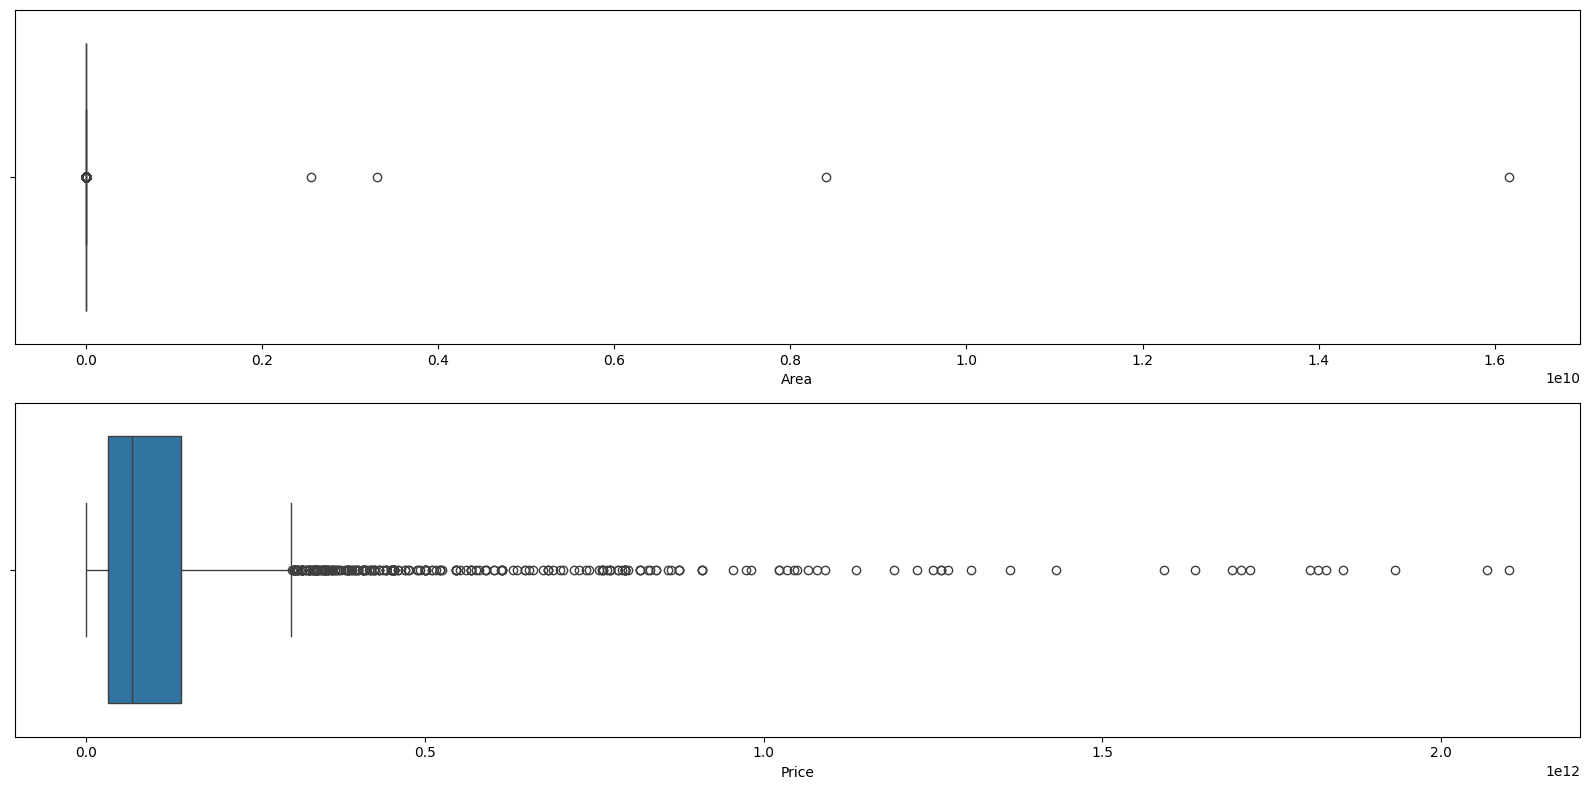

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
sns.boxplot(x=df.Area)
plt.subplot(2,1,2)
sns.boxplot(x=df.Price)
plt.tight_layout()
plt.show()

- Using **Z-Score**

In [23]:
def remove_outliers_z_score(data:pd.DataFrame, column_name:str, threshold:float= 3) -> pd.DataFrame:
    """Remove outliers using Z-score method."""
    z_scores = np.abs((data[column_name] - np.mean(data[column_name])) / np.std(data[column_name]))
    return data[z_scores < threshold]

- Using **IQR**

In [24]:
def remove_outliers_iqr(data:pd.DataFrame, column_name:str, threshold:float= 1.5) -> pd.DataFrame:
    """Remove outliers using IQR method."""
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    return data[~((data[column_name] < (Q1 - threshold * IQR)) | (data[column_name] > (Q3 + threshold * IQR)))]

In [25]:
# Example usage
# print(f'> Number of dataset samples before handling outliers is {len(df)}.')
# df = remove_outliers_z_score(df, 'Price')
# print(f'> Number of dataset samples after handling outliers is {len(df)}.')
# print("Cleaned Data (Z-Score): \n", df)

In [26]:
# Example usage
print(f'> Number of dataset samples before handling outliers is {len(df)}.')
df = remove_outliers_iqr(df, 'Price')
print(f'> Number of dataset samples after handling Price outliers is {len(df)}.')
df = remove_outliers_iqr(df, 'Area')
print(f'> Number of dataset samples after handling Area outliers is {len(df)}.')
df.reset_index(drop= True, inplace= True)
print("> Cleaned Data (IQR): ")
df.info()

> Number of dataset samples before handling outliers is 3248.
> Number of dataset samples after handling Price outliers is 2976.
> Number of dataset samples after handling Area outliers is 2884.
> Cleaned Data (IQR): 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2884 entries, 0 to 2883
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       2884 non-null   int64  
 1   Room       2884 non-null   int64  
 2   Parking    2884 non-null   bool   
 3   Warehouse  2884 non-null   bool   
 4   Elevator   2884 non-null   bool   
 5   Address    2884 non-null   object 
 6   Price      2884 non-null   float64
dtypes: bool(3), float64(1), int64(2), object(1)
memory usage: 98.7+ KB


### V : Save the cleaned dataset

In [27]:
# dataset_path = r'/content/drive/My Drive/Applied Machine Learning/Project 1 : Tehran House Price Prediction/datasets/cleaned_housePrice.csv'
dataset_path = r'C:/Users/Afshin/Desktop/Project_1/datasets/cleaned_housePrice.csv'
df.to_csv(dataset_path, index= False)
print(f"> Cleaned dataset Saved to {dataset_path}")

> Cleaned dataset Saved to C:/Users/Afshin/Desktop/Project_1/datasets/cleaned_housePrice.csv
